1. **State**

    Start by defining the State of the graph.

    This state schema acts as the input structure for all Nodes and Edges within the graph.

In [34]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

In [35]:
def node1(state):
    print("----Node1----")
    return {"graph_state": state["graph_state"] + " " + "welcome"}

def node2(state):
    print("----Node2----")
    return {"graph_state": state["graph_state"] + " to the DataHack Summit!"}

def node3(state):
    print("----Node3----")
    return {"graph_state": state["graph_state"] + " Enjoy the event!"}

In [36]:
import random
from typing import Literal

def decide_node(state) -> Literal["node2", "node3"]:
    user_input = state["graph_state"]

    if random.random() < 0.5:
        return "node2"
    
    return "node3"

In [30]:
decide_node({"graph_state":"Taha"})

'node2'

**StateGraph**

    It is used to tell that how the graph state will be , tell the type of node all share


**Defining Nodes**

    .add_node is used to define the nodes with there names and original python functions

**Defining Edges**

1) the edge is used to connect how the node will be execute , like the node with the start always execution of a    graph start from there

2) the add_conditional_edges is used to decide where to go after start ,mostly we add there our logic to redirect on which node after the start of graph

3) the node with ends tell that if graph comes on them the node executes and end the graph

**Compile of Graph**

   This freezes the design into an executable graph.


**Invoking graph**

    Means how to run a graph , we use graph.invoke, like this
    graph = builder.compile()
    graph.invoke(user_input)


In [41]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Image, display
builder = StateGraph(State)

#defining Nodes
builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_node("node3", node3)

#logic - Defining Edges
builder.add_edge(START,"node1")
builder.add_conditional_edges("node1",decide_node)
builder.add_edge("node2",END)
builder.add_edge("node3",END)

# compile the graph
graph = builder.compile()


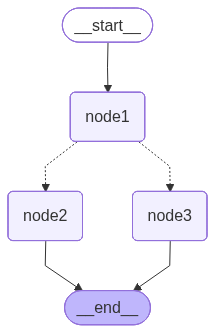

In [38]:
graph

In [40]:
graph.invoke({"graph_state":"Taha"})

----Node1----
----Node2----


{'graph_state': 'Taha welcome to the DataHack Summit!'}

Let's build a simple chain that combines 4 concepts:

Using chat messages as our graph state

Using chat models in graph nodes

Binding tools to our chat model


Executing tool calls in graph nodes

**1. Messages**

Chat models can handle different types of messages representing various roles in a conversation. LangChain supports key message types like:

HumanMessage - from the user

AIMessage - from the chat model

SystemMessage - to guide the model's behavior

ToolMessage - responses from tool calls

Let's build a list of messages. Each message can include:

content - the message text

name - optional author name

response_metadata - optional metadata (e.g. from model providers for AIMessage, like OpenAI)

In [46]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

messages = [AIMessage(content="Hello, I'm your virtual travel assistant for Bengaluru. How can I help you plan your visit?", name="Agent")]
messages.append(HumanMessage(content="Hi, I'm visiting Bengaluru for the first time. Can you suggest key places to see?", name="Miguel"))
messages.append(AIMessage(content="Certainly. Some must-visit places include Lalbagh Botanical Garden, Bangalore Palace, and Cubbon Park. Are you interested in cultural sites, nature, or food experiences?", name="Agent"))
messages.append(HumanMessage(content="I'm interested in a mix of history and local cuisine.", name="Miguel"))
messages.append(AIMessage(content="Great choice. You can explore Tipu Sultan's Summer Palace for history, then head to VV Puram Food Street for authentic local dishes.", name="Agent"))


In [48]:
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Agent

Hello, I'm your virtual travel assistant for Bengaluru. How can I help you plan your visit?
================================ Human Message =================================
Name: Miguel

Hi, I'm visiting Bengaluru for the first time. Can you suggest key places to see?
================================== Ai Message ==================================
Name: Agent

Certainly. Some must-visit places include Lalbagh Botanical Garden, Bangalore Palace, and Cubbon Park. Are you interested in cultural sites, nature, or food experiences?
================================ Human Message =================================
Name: Miguel

I'm interested in a mix of history and local cuisine.
================================== Ai Message ==================================
Name: Agent

Great choice. You can explore Tipu Sultan's Summer Palace for history, then head to VV Puram Food Street for authentic local dishe

In [ ]:
import os
os.environ["GROQ_API_KEY"] = "your_groq_api_key_here"
print("Groq key:", os.getenv("GROQ_API_KEY"))

Groq key: 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


In [60]:
from langchain_groq import ChatGroq
llm = ChatGroq(model = "llama-3.3-70b-versatile",temperature=0)
result = llm.invoke(messages)


In [63]:
type(result)

langchain_core.messages.ai.AIMessage

In [64]:
result.pretty_print()

================================== Ai Message ==================================

 Don't miss the ISKCON Temple and try some traditional South Indian cuisine at MTR (Mavalli Tiffin Room) or Karavalli. Would you like more recommendations or details on these places?


In [65]:
result.content

" Don't miss the ISKCON Temple and try some traditional South Indian cuisine at MTR (Mavalli Tiffin Room) or Karavalli. Would you like more recommendations or details on these places?"

**Tools**

Tools are valuable when you need a model to interact with external systems.

These systems (such as APIs) typically expect structured inputs rather than natural language.

By binding an API as a tool, you make the model aware of the expected input format.

The model decides when to call a tool based on the user's natural language input, and the output will follow the tool's defined schema.

Many LLM providers now support tool calling, and LangChain offers a straightforward interface for it.

You can bind any Python function using ChatModel.bind_tools(function).

Let's showcase a very simple example of tool calling. The multiply function is our tool.



In [77]:
def multiple(a:int,b:int) -> int:
    return a*b

llm_with_tools = llm.bind_tools([multiple])

In [78]:
no_tool_call = llm_with_tools.invoke(
    [HumanMessage(content = "What is the way to Bangalore from Chennai?",name = "Miguel")]
)

In [80]:
no_tool_call.pretty_print()

================================== Ai Message ==================================

You can take a flight from Chennai International Airport to Kempegowda International Airport in Bangalore. Alternatively, you can take a train from Chennai Central Railway Station to Bangalore City Railway Station, or a bus from Chennai's Koyambedu Bus Stand to Bangalore's Kempegowda Bus Station. You can also drive from Chennai to Bangalore via the NH48 highway, which takes around 6-7 hours depending on traffic.


In [81]:
no_tool_call.content

"You can take a flight from Chennai International Airport to Kempegowda International Airport in Bangalore. Alternatively, you can take a train from Chennai Central Railway Station to Bangalore City Railway Station, or a bus from Chennai's Koyambedu Bus Stand to Bangalore's Kempegowda Bus Station. You can also drive from Chennai to Bangalore via the NH48 highway, which takes around 6-7 hours depending on traffic."

In [83]:
tool_call = llm_with_tools.invoke(
    [HumanMessage(content = f"What is 2 multiplied by 3",name = "Miguel")]
)

In [84]:
tool_call.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  multiple (pfmevz1am)
 Call ID: pfmevz1am
  Args:
    a: 2
    b: 3


In [ ]:
#no content as the tool call was used
tool_call.content

''

In [86]:
tool_call.tool_calls

[{'name': 'multiple',
  'args': {'a': 2, 'b': 3},
  'id': 'pfmevz1am',
  'type': 'tool_call'}]